In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法正常显示的问题

In [2]:
PATH = "../dataset/gym_members_data.csv"
data_df = pd.read_csv(PATH)
data_df.drop("Index", axis=1, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

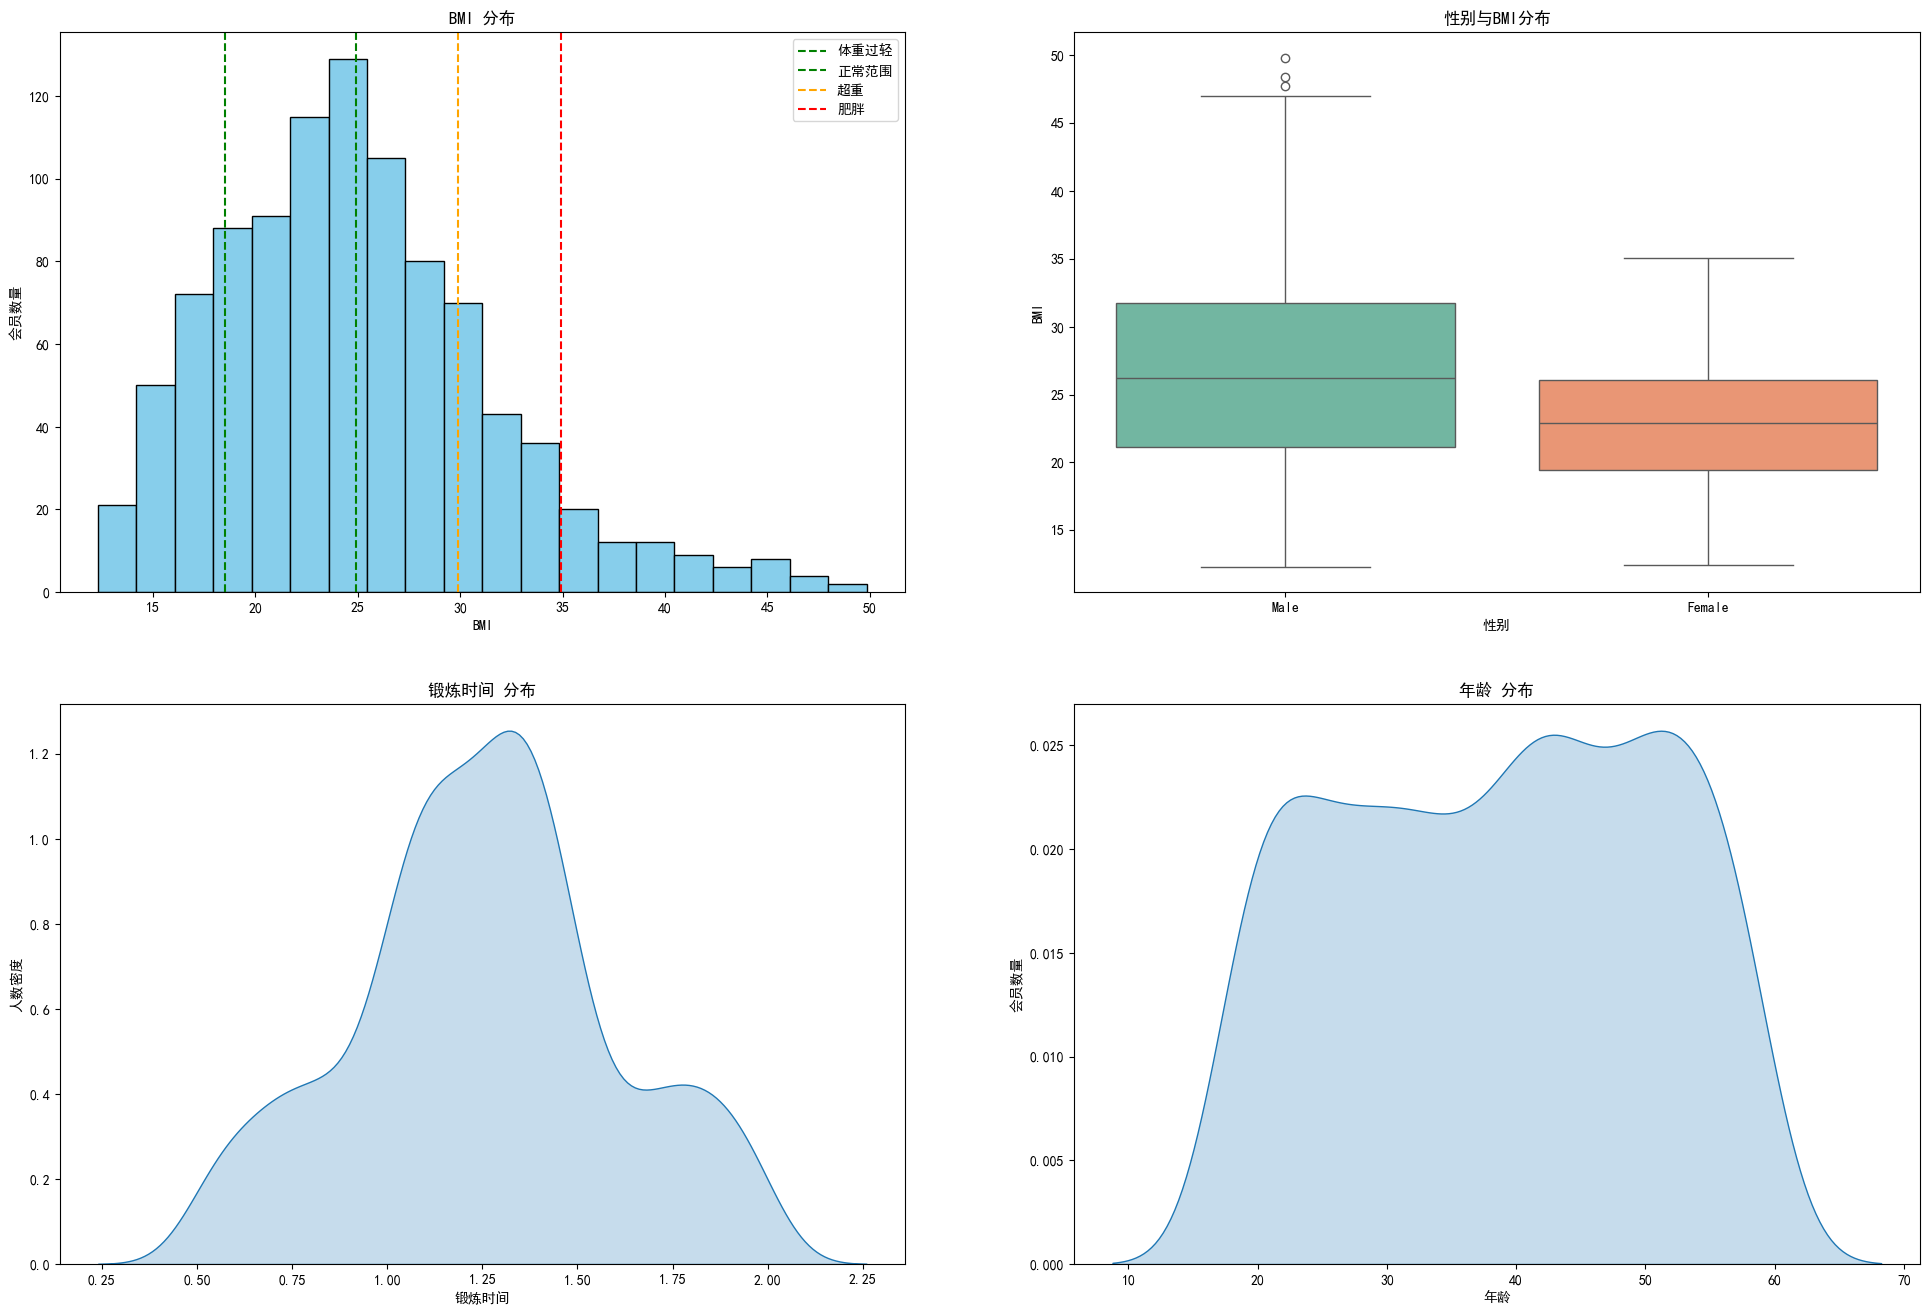

In [3]:
# 总览数据的分布情况
plt.figure(figsize=(24, 16))


plt.subplot(2, 2, 1)
plt.hist(data_df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('BMI 分布')
plt.xlabel('BMI')
plt.ylabel('会员数量')
plt.axvline(x=18.5, color='green', linestyle='--', label='体重过轻')
plt.axvline(x=24.9, color='green', linestyle='--', label='正常范围')
plt.axvline(x=29.9, color='orange', linestyle='--', label='超重')
plt.axvline(x=34.9, color='red', linestyle='--', label='肥胖')
plt.legend()


# hue=data_df['Gender'] 添加了一个色调语义维度，根据性别进一步分组数据，并为不同组的数据提供不同的颜色
plt.subplot(2, 2, 2)
sns.boxplot(x=data_df['Gender'], y=data_df['BMI'], palette="Set2", hue=data_df['Gender'], legend=False)
plt.title('性别与BMI分布')
plt.xlabel('性别')
plt.ylabel('BMI')

plt.subplot(2, 2, 3)
sns.kdeplot(data_df['Session_Duration (hours)'], fill=True)
plt.title('锻炼时间 分布')
plt.xlabel('锻炼时间')
plt.ylabel('人数密度')

plt.subplot(2, 2, 4)
sns.kdeplot(data_df['Age'], fill=True)
plt.title('年龄 分布')
plt.xlabel('年龄')
plt.ylabel('会员数量')

# plt.tight_layout()
plt.show()

# 一、数据分布
## 1、BMI分布
绝大多数锻炼者的BMI集中在正常范围；特别的，肥胖的锻炼者比偏瘦的锻炼者要多一些；这说明来健身房减肥的锻炼者比来健身房增肌的锻炼者更多。健身房要注重向肥胖者推荐健身，因为相比瘦子，他们有更强的健身意愿。

## 2、性别与BMI分布
①个体间的BMI差异相当大；特别的，男性的BMI个体差异性要明显大于女性；

②男性的BMI普遍高于女性；

## 3、锻炼时间分布
锻炼时间集中在1.25小时左右，并呈现一个正态分布；

## 4、年龄分布
40-60岁的锻炼者比例要略高于40岁以下的锻炼者。说明有相当一部分人是上了年纪后，身体大不如前才萌生了健身的想法。因此可以多多向这些上了年纪且身材走形的人推荐健身塑性。

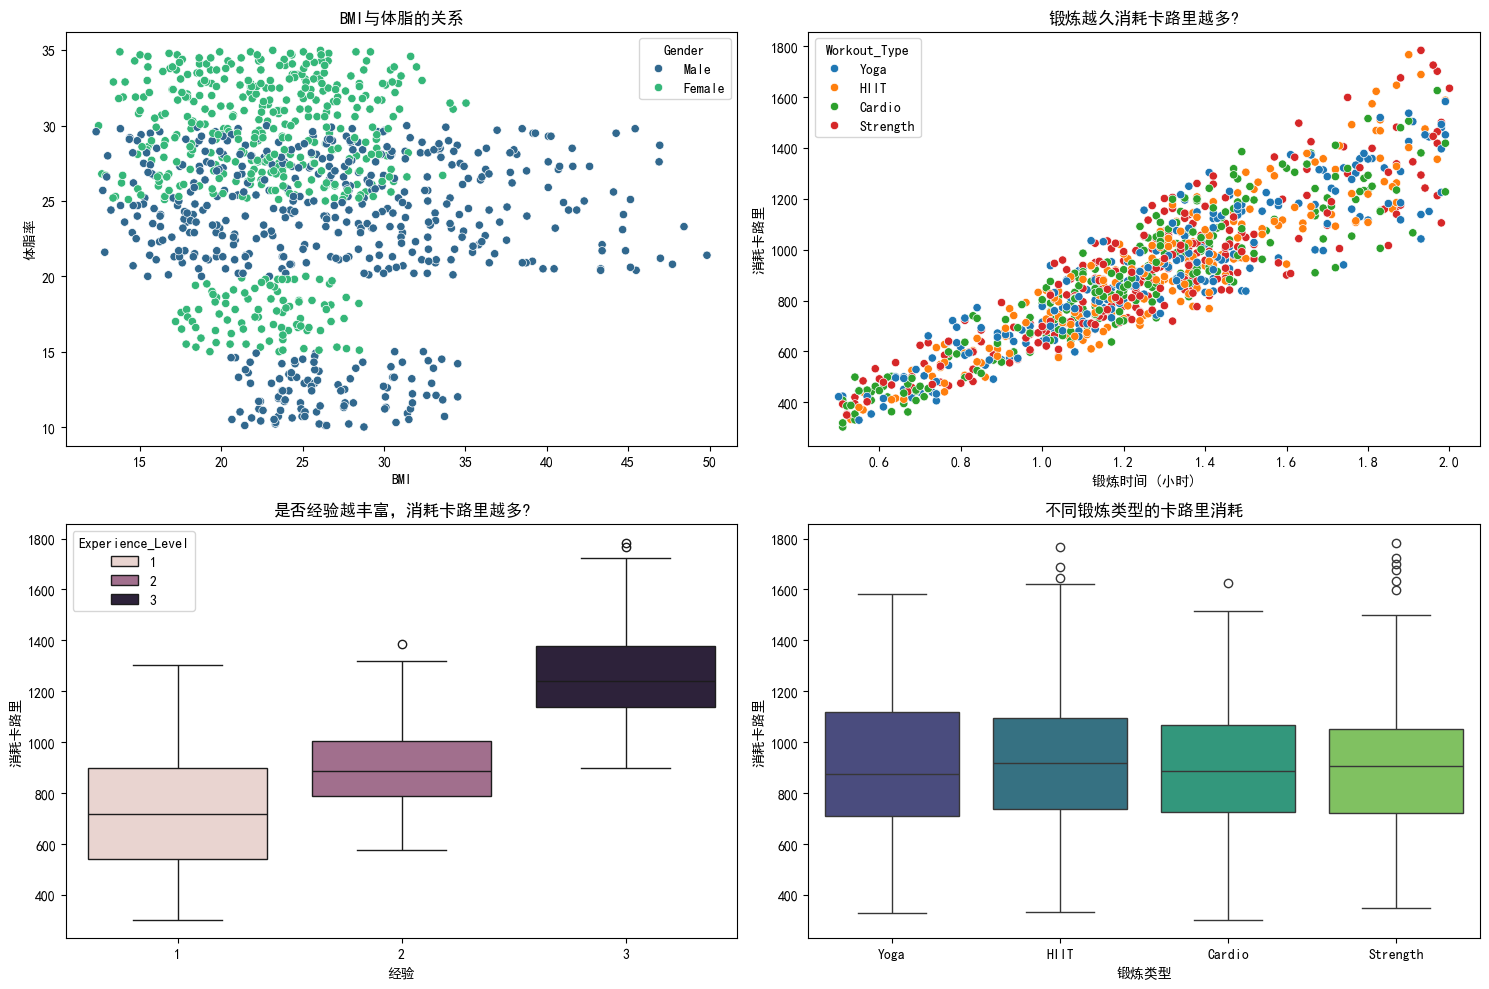

In [3]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)

sns.scatterplot(x=data_df['BMI'], y=data_df['Fat_Percentage'], hue=data_df['Gender'], palette="viridis")
plt.title('BMI与体脂的关系')
plt.xlabel('BMI')
plt.ylabel('体脂率')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data_df['Session_Duration (hours)'], y=data_df['Calories_Burned'], hue=data_df['Workout_Type'])
plt.title('锻炼越久消耗卡路里越多?')
plt.xlabel('锻炼时间 (小时)')
plt.ylabel('消耗卡路里')

plt.subplot(2, 2, 3)
sns.boxplot(x=data_df['Experience_Level'], y=data_df['Calories_Burned'],hue=data_df['Experience_Level'])
plt.title('是否经验越丰富，消耗卡路里越多?')
plt.xlabel('经验')
plt.ylabel('消耗卡路里')

plt.subplot(2, 2, 4)
sns.boxplot(x=data_df['Workout_Type'], y=data_df['Calories_Burned'], palette="viridis", hue=data_df['Workout_Type'])
plt.title('不同锻炼类型的卡路里消耗')
plt.xlabel('锻炼类型')
plt.ylabel('消耗卡路里')

plt.tight_layout()
plt.show()

# 二、数据间关联分析

## 1、BMI与体脂的关系
①观察图像会发现，男女的体脂率出现的很强的分离性，男性的体脂普遍低于女性；

②而且，无论男女，他们的体脂率高低都出现断层；这可能是由于锻炼和不锻炼体脂率有显著差别；一旦开始锻炼，体脂会显著下降，从而与那些不锻炼的人体脂形成了差距，也即"断层"；

③此外，低体脂基本只出现在BMI处在正常范围内的人；这说明极端的瘦子和胖子都缺乏锻炼习惯；瘦(BMI低)不等于低体脂，胖(BMI高)也一定不意味着高体脂。体脂是实实在在需要锻炼才能降低的。

## 2、锻炼时间与消耗卡路里
①从图中可以明显看出，锻炼时间越长，消耗卡路里越多；

②同时，可以看出，随着锻炼时间的增加，不同人消耗卡路里的差异性也在增加；
推断是由于时间的增加放大了其他因素对卡路里消耗的影响；比如HIIT本身对能量的消耗就较高，随着时间增长，其消耗的能量与较低强度的瑜伽差距也就拉大了；

## 3、经验对消耗卡路里的影响
①从图中可以明显看出，经验越丰富的锻炼者，消耗卡路里越多；这一方面可能是经验丰富者锻炼时更加科学，动作更加标准，从而锻炼效果更显著；此外，经验丰富可能会影响其他行为，如锻炼市场；经验丰富者可能会倾向于锻炼更久，从而消耗卡路里也增加了。

②经验为1的锻炼者消耗卡路里的个体差异性最大，而随着经验的增加，这种差异性在缩小。这说明了积累锻炼经验能够缩小不同人间锻炼效果的差异性。

## 4、不同锻炼类型对消耗卡路里的影响
①瑜伽锻炼效果的个体差异性最大，而力量训练则最小；这说明瑜伽锻炼的效果受到很多因素的影响，因此个体差异性较大；反观力量训练，其对能量的消耗可能主要受强度影响，因此个体差异性较小。

②HIIT对卡路里消耗的上限最高；这可能说明强度影响着卡路里消耗的上限。

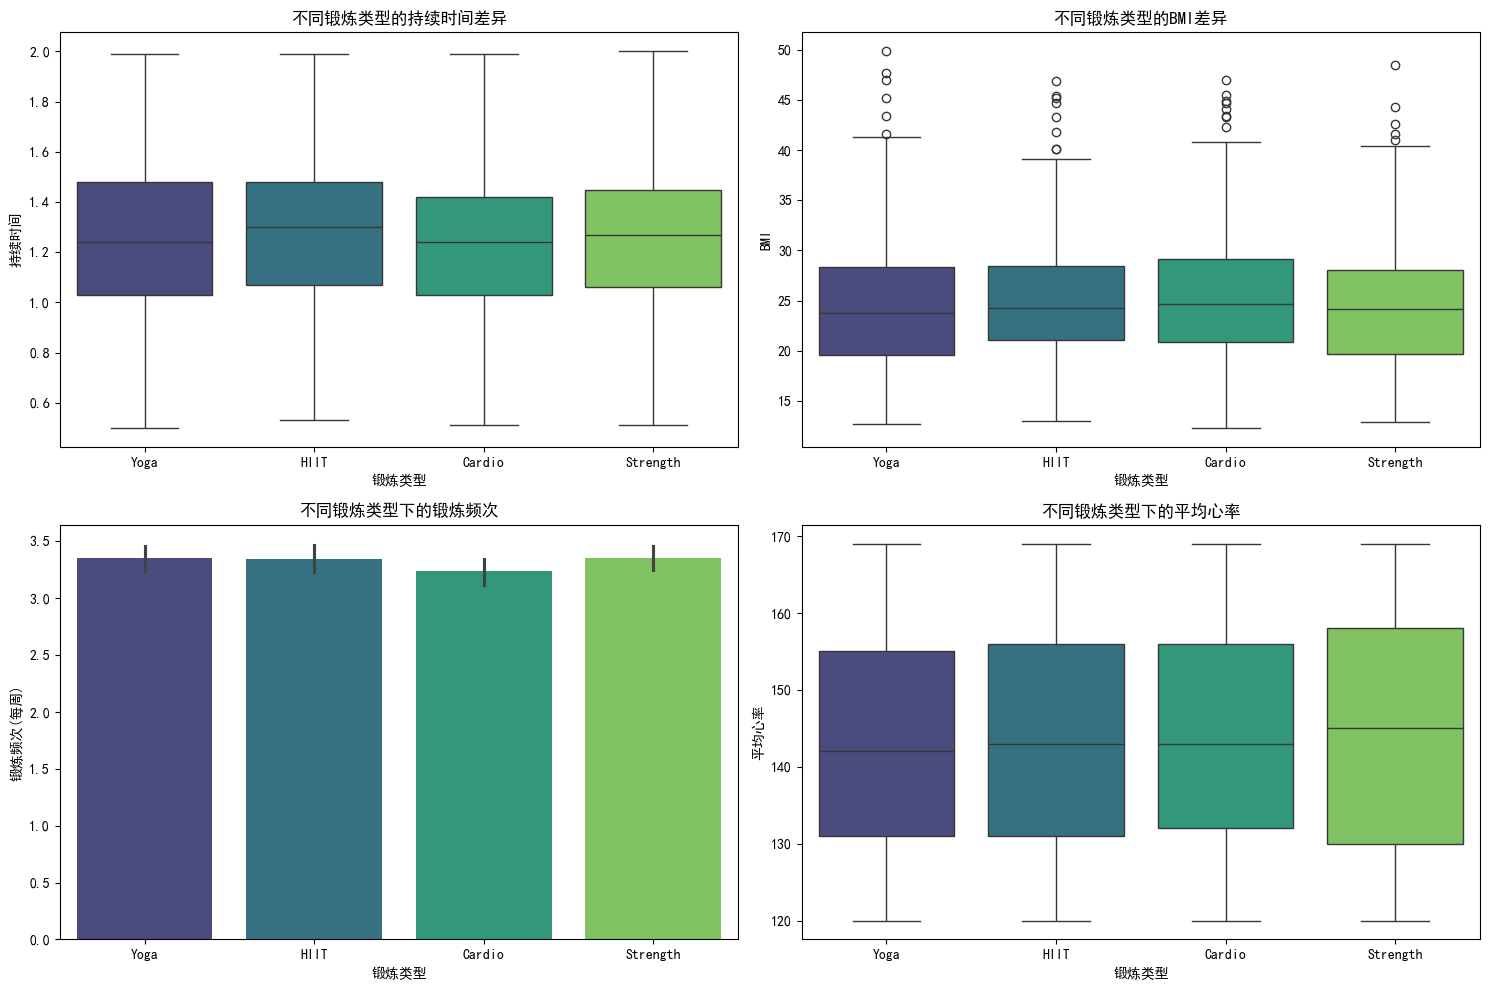

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=data_df['Workout_Type'], y=data_df['Session_Duration (hours)'], hue=data_df['Workout_Type'], palette="viridis")
plt.title('不同锻炼类型的持续时间差异')
plt.xlabel('锻炼类型')
plt.ylabel('持续时间')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_df['Workout_Type'], y=data_df['BMI'], hue=data_df['Workout_Type'], palette="viridis")
plt.title('不同锻炼类型的BMI差异')
plt.xlabel('锻炼类型')
plt.ylabel('BMI')

plt.subplot(2, 2, 3)
sns.barplot(x=data_df['Workout_Type'], y=data_df['Workout_Frequency (days/week)'], hue=data_df['Workout_Type'], palette="viridis")
plt.title('不同锻炼类型下的锻炼频次')
plt.xlabel('锻炼类型')
plt.ylabel('锻炼频次(每周)')

plt.subplot(2, 2, 4)
sns.boxplot(x=data_df['Workout_Type'], y=data_df['Avg_BPM'], hue=data_df['Workout_Type'], palette="viridis")
plt.title('不同锻炼类型下的平均心率')
plt.xlabel('锻炼类型')
plt.ylabel('平均心率')

plt.tight_layout()
plt.show()

# 三、进一步探究不同锻炼类型对消耗卡路里的影响

前面第4在探究不同锻炼类型对消耗卡路里的影响时，没有纳入锻炼时间、频次和强度(通过平均心率)评估这些影响因素。例如，如果说HIIT的平均锻炼时长就是比瑜伽长的，那么它消耗的卡路里数自然也应该更多。此处就是为了知道到底是什么因素影响着卡路里的消耗。

## 1、不同锻炼类型的持续时间
①HIIT的持续时间最长。这点比较让我疑惑，正常来讲HIIT就是追求短时间高强度带来的刺激效果，可是它的锻炼时长却是最长的，可能是间歇时长偏长导致的? 这点我对间歇训练时长控制的合理性表示一定的怀疑；

②相比之下，有氧运动锻炼时间最短。这点也比较让我疑惑，难道是有氧运动比较乏味所以持续时间不长？像慢跑，步行都属于有氧运动，正常来说想要长时间锻炼是不难的；

## 2、选择不同锻炼类型的学员体脂情况
①为了解决1中②的疑惑，我们研究选择不同锻炼类型的学员体脂情况。结果发现，选择有氧运动的学员BMI最高。可以推断，选择有氧运动的学员多是出于减肥的目的，较短的锻炼时长也符合他们的身体状况。

②选择瑜伽的学员BMI差异性最大，可见瑜伽对于体脂的要求最低，适合不同体型的人进行。

## 3、锻炼频次的分析
①HIIT和Strength的锻炼频次较高。这可能是由于HIIT和力量锻炼通常是有较强目的性的锻炼。锻炼者希望能显著地锻炼到身体，因此选择锻炼得更加频繁。

②Yoga和Cardio的锻炼频次略低。这可能是由于此类运动强度较低并且相较枯燥，更适合低频次但长时间的锻炼。

## 4、不同锻炼类型的心率差异
①瑜伽的心率最低符合一般认知；而力量训练的心率最高。这说明力量训练虽然是无氧运动，但对于心肺的刺激依然是十分显著的。

②瑜伽的心率个体差异性最小，而力量训练心率的个体差异性最大。来自AI的解释:

(I)瑜伽与心率变异性：瑜伽作为一种低强度的活动，通常强调呼吸、放松和身体柔韧性。这些特点可能有助于降低心率的个体差异性。研究表明，瑜伽练习可以提高个体自主神经灵活性，从而可能影响心率变异性。

(II)力量训练与心率：力量训练通常是一种高强度的活动，个体的体能水平、训练强度和恢复能力会显著影响心率。例如，耐力运动员的心率恢复斜率更大，表明他们的心脏调节能力更强，往往心率会更低。


# 四、使用KMeans算法为用户画像分类

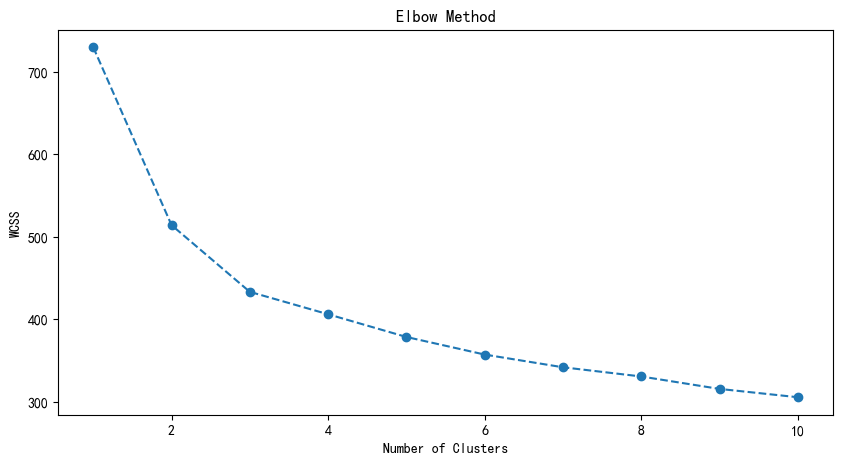

In [5]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

#选择相关特征进行聚类
features = [
    'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
    'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'
]

# 标准化: (X - Xmean) / Xstd
X = data_df[features]
z_scaler = preprocessing.StandardScaler()
std_data = z_scaler.fit_transform(X)
# 归一化： (X - Xmin) / (Xmax - Xmin)
min_max_scaler = preprocessing.MinMaxScaler()
std_data = min_max_scaler.fit_transform(std_data)

#使用Elbow方法找到最佳簇数
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
k_means = KMeans(init='k-means++', n_clusters=4, max_iter=500)
label: np.ndarray = k_means.fit_predict(std_data)
# 查看聚类结果
result = data_df.copy()
result["Cluster"] = label
result = result[["Cluster", *result.columns[:-1]]]
result = result.sort_values("Cluster")
result


,Cluster,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
486,0,53,Male,115.4,1.92,193,161,50,1.36,1084.0,Yoga,28.3,2.2,4,2,31.30
322,0,20,Female,74.7,1.58,172,166,62,1.04,863.0,Strength,32.8,2.4,3,2,29.92
671,0,34,Male,52.0,1.78,171,130,53,1.38,987.0,Strength,22.4,2.7,4,2,16.41
319,0,49,Female,44.1,1.65,189,133,74,1.16,694.0,HIIT,26.7,1.8,4,2,16.20
672,0,22,Male,71.0,1.93,162,139,53,1.42,1086.0,Yoga,21.2,2.9,4,2,19.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,3,32,Female,70.5,1.62,177,122,58,1.24,756.0,Strength,28.4,1.8,2,1,26.86
594,3,23,Male,108.6,1.92,197,134,50,0.89,656.0,Yoga,25.8,3.5,2,1,29.46
137,3,56,Male,69.3,1.68,195,138,58,0.66,451.0,Yoga,26.5,2.1,2,1,24.55
147,3,59,Male,50.3,1.95,188,167,55,1.07,885.0,Strength,24.4,3.4,3,1,13.23


In [7]:
# 再逆变换归一化步骤
cluster_centers_std = min_max_scaler.inverse_transform(k_means.cluster_centers_)
# 先逆变换标准化步骤
cluster_centers_orig = z_scaler.inverse_transform(cluster_centers_std)

cluster_centers_df = pd.DataFrame(cluster_centers_orig, columns=features)
cluster_centers_df['Cluster'] = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'cluster 4']
cluster_centers_df = cluster_centers_df.set_index('Cluster')

cluster_centers_df

,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Cluster,,,,,,,,,,
Cluster 0,179.400990,144.240099,62.014851,1.249010,903.002475,27.285891,2.481931,3.537129,2.000000,25.278267
Cluster 1,180.350785,143.251309,62.408377,1.759267,1265.340314,14.790576,3.123037,4.534031,3.000000,24.747592
Cluster 2,181.559406,143.415842,68.262376,0.983267,706.252475,27.303960,2.571782,2.490099,1.009901,24.834455
cluster 4,178.562500,143.642045,55.568182,1.041250,748.977273,28.059659,2.482955,2.465909,1.000000,24.339375


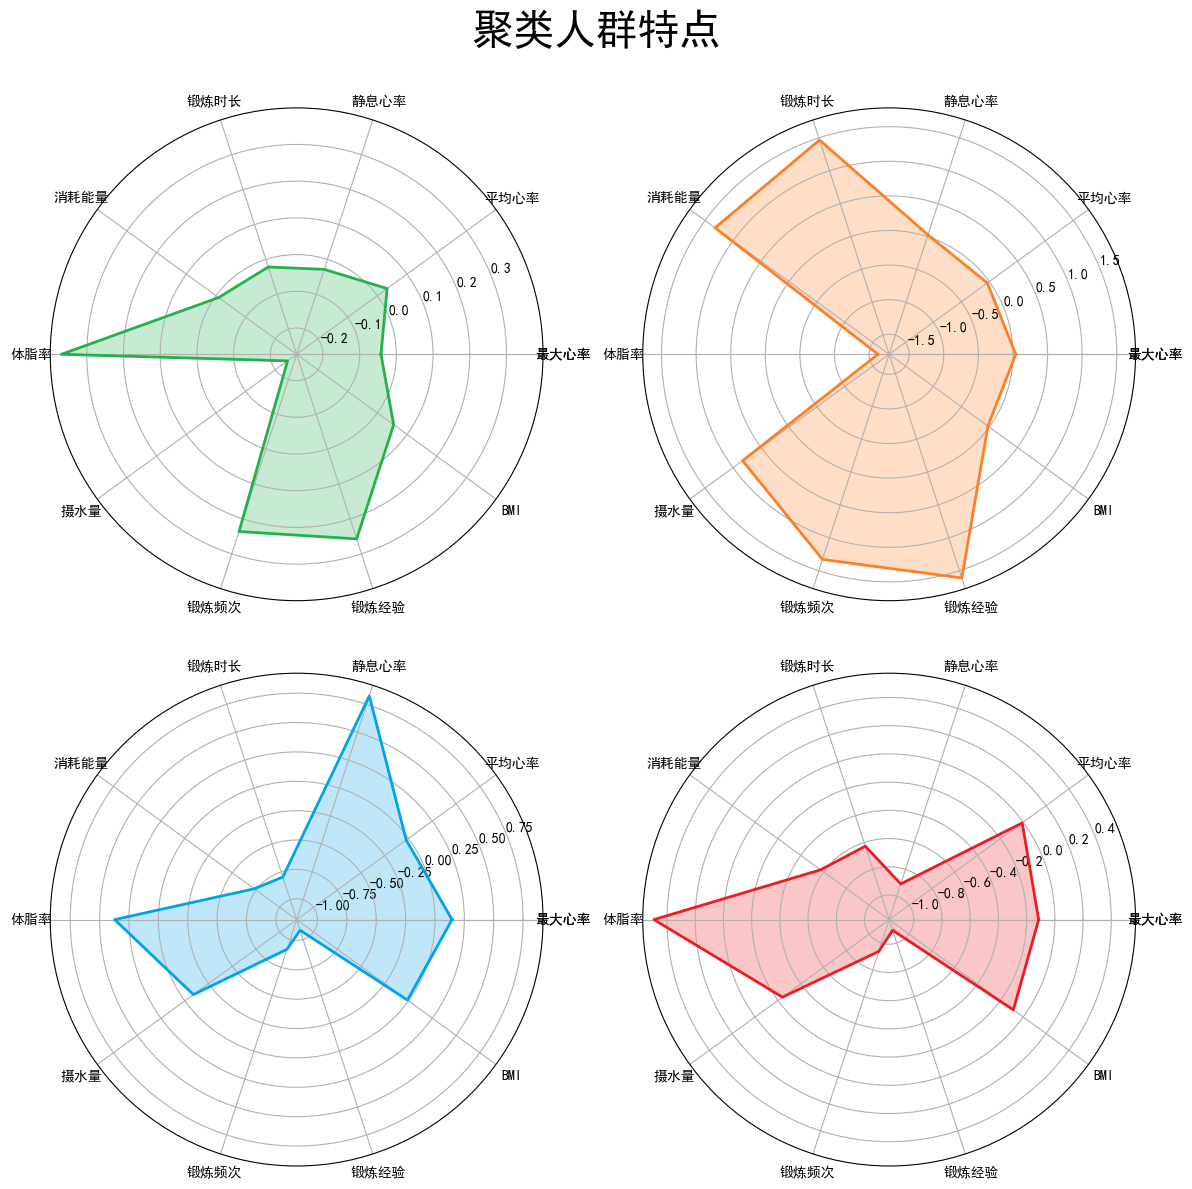

In [61]:
# 准备数据
chinese_features = ['最大心率', '平均心率', '静息心率', '锻炼时长', '消耗能量', '体脂率', '摄水量', '锻炼频次', '锻炼经验', 'BMI']
labels = np.array(chinese_features)  # 分类标签
stats = np.array(cluster_centers_std)  # 每个分类的值

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # 使图形封闭

# 绘制雷达图
fig = plt.figure(figsize=(12, 12))

# 为每个聚类中心绘制雷达图
num_clusters = stats.shape[0]
colors = ["#22B14C", "#FF7F27", "#00A2E8", "#ED1C24"]
for i, color in enumerate(colors):
    ax = plt.subplot(2, 2, i+1, polar=True)
    # 提取每个聚类中心的值，并添加第一个值到末尾以封闭图形
    stats_closed = np.concatenate((stats[i, :], [stats[i, 0]]))
    # 绘制填充颜色和线条
    plt.fill(angles, stats_closed, color=color, alpha=0.25)
    plt.plot(angles, stats_closed, color=color, linewidth=2)
    ax.set_thetagrids(np.degrees(angles), np.concatenate((labels, [labels[0]])))

# 显示图形
fig.suptitle('聚类人群特点', size=30, color='black', y=1)
fig.tight_layout()
plt.show()